<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/SCT_DS_2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic EDA



# Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set visualization aesthetics

In [ ]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# Load the Titanic dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1: Data Cleaning

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Verify no missing values left
print("\nMissing values after cleaning:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-5-93880af613a0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-93880af613a0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# Step 2: Univariate Analysis

# Count plot for target variable (Survived)

<ipython-input-6-fad747bad374>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


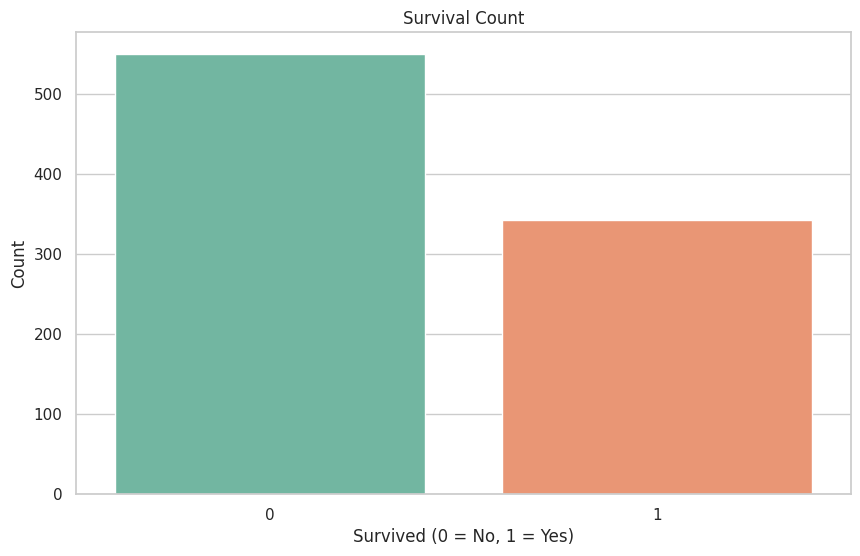

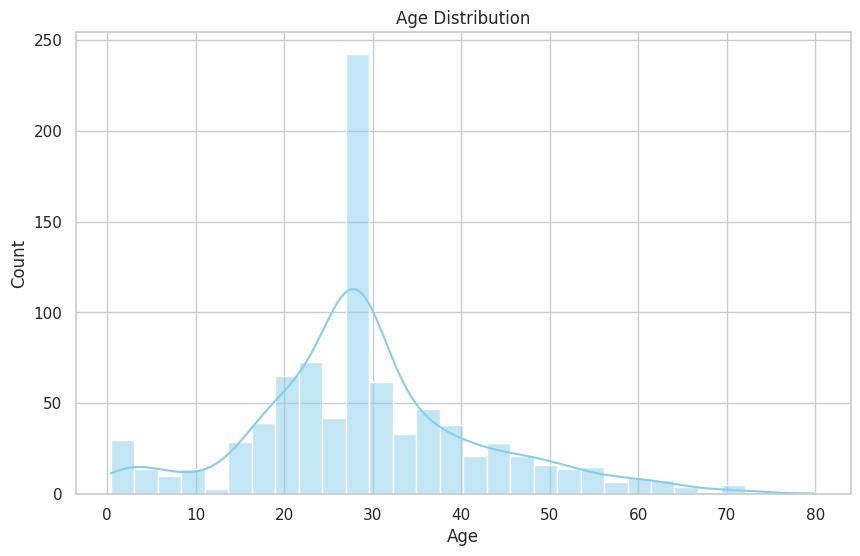

<ipython-input-6-fad747bad374>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


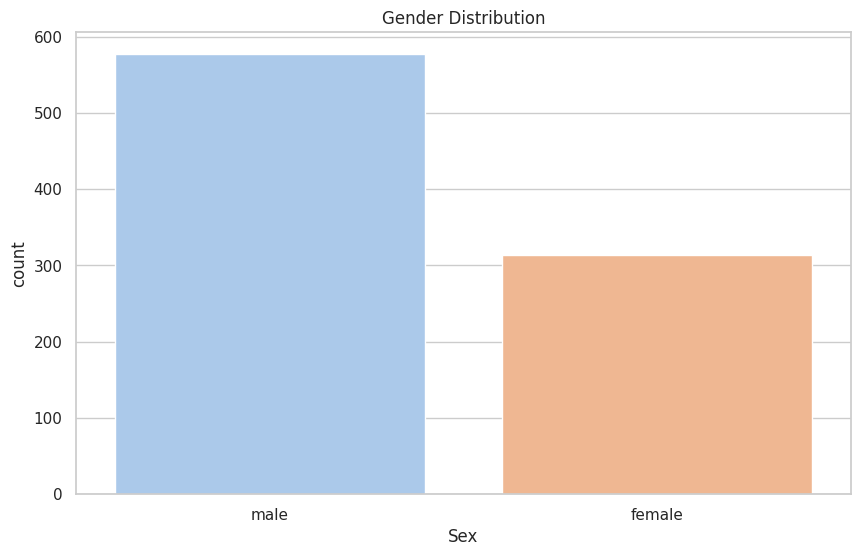

In [ ]:
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Distribution of Age

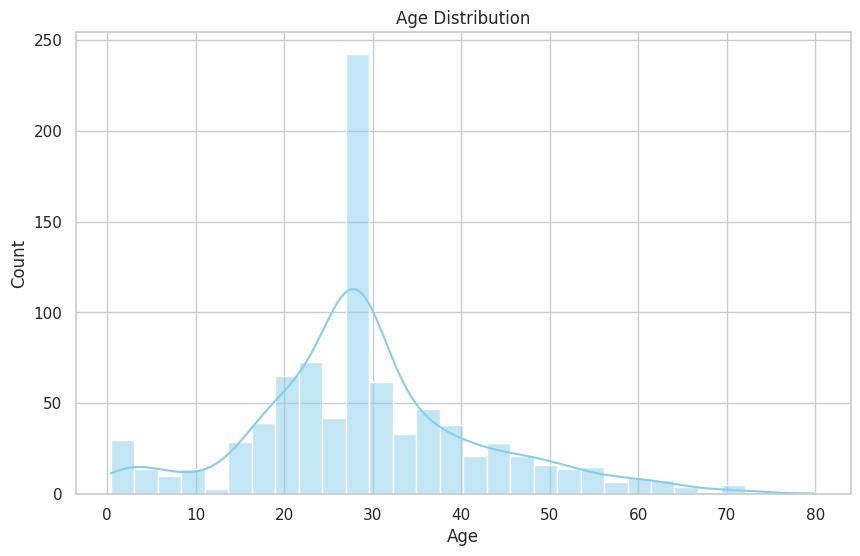

In [ ]:
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Gender distribution

<ipython-input-13-fc3f0515f93f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


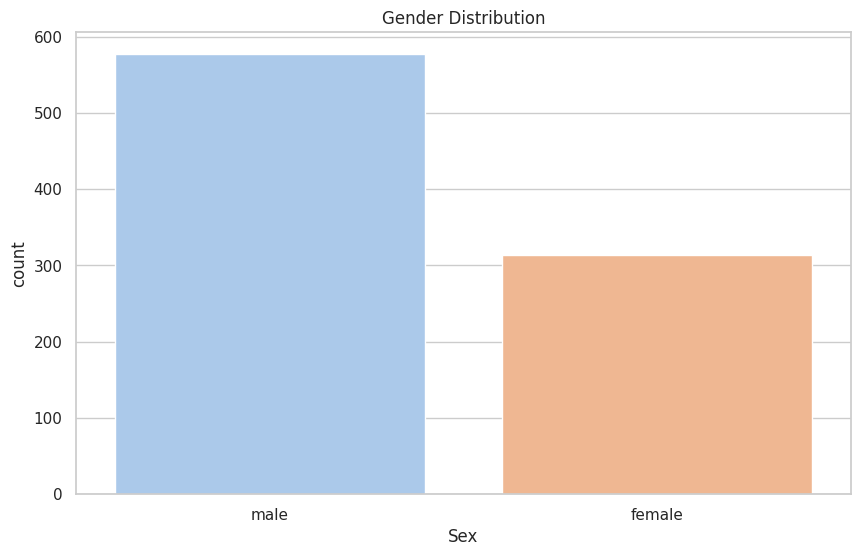

In [ ]:
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Step 3: Bivariate Analysis

# Survival by Sex

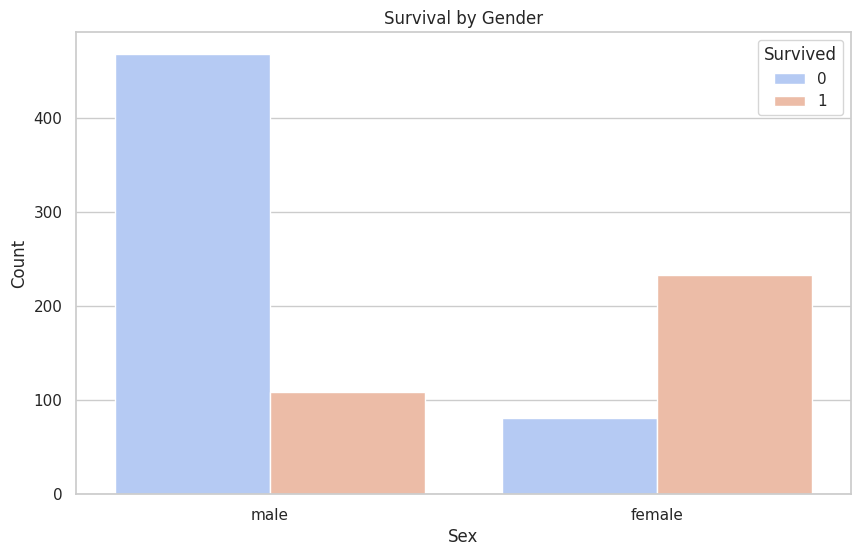

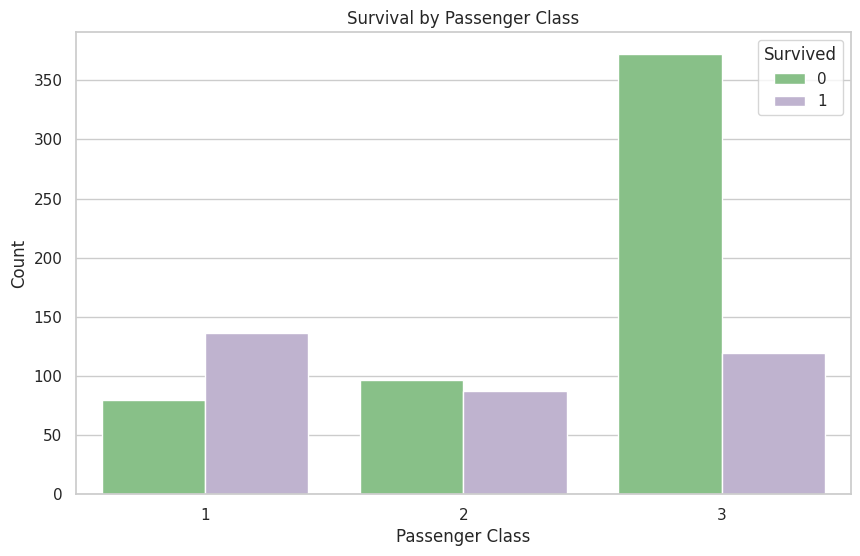

<ipython-input-7-dc6cc2e778d8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')


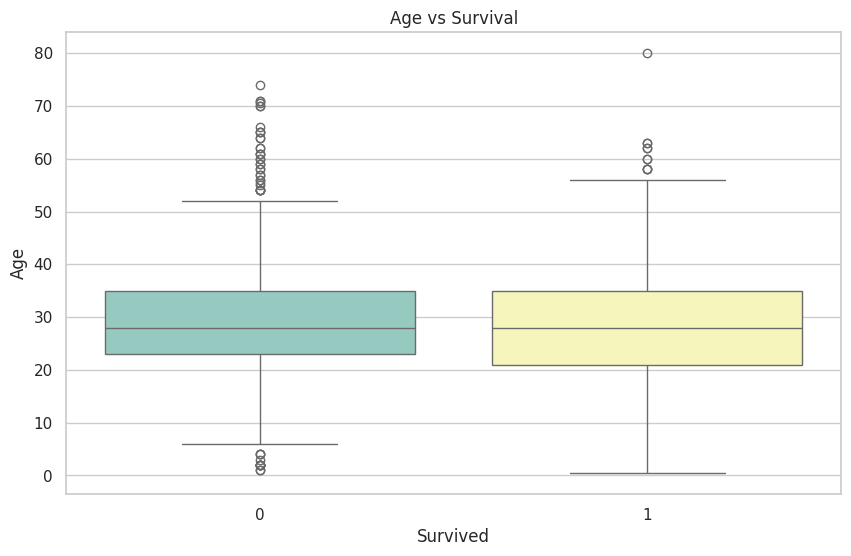

In [ ]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.show()

>Shows the relationship between gender and survival.

>Useful for identifying gender bias in survival rate.

# Survival by Pclass

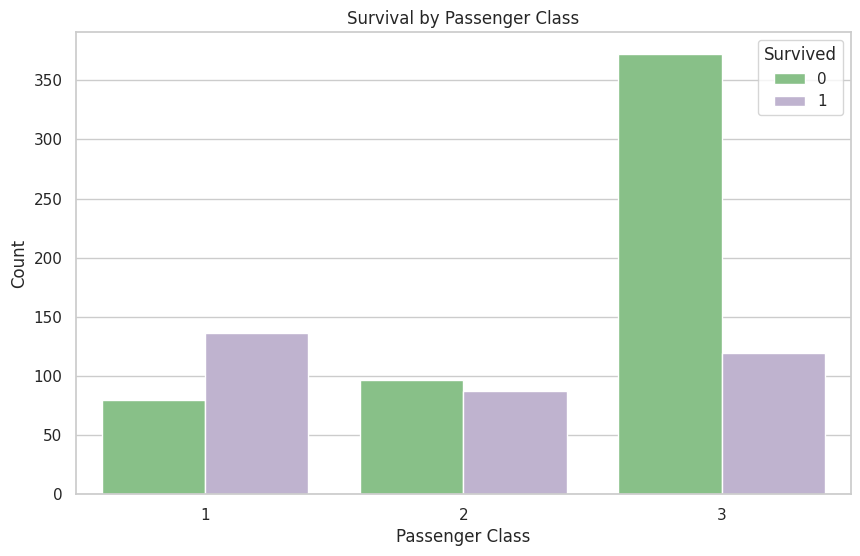

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Accent')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Age vs Survival

<ipython-input-15-2d15cb54d029>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')


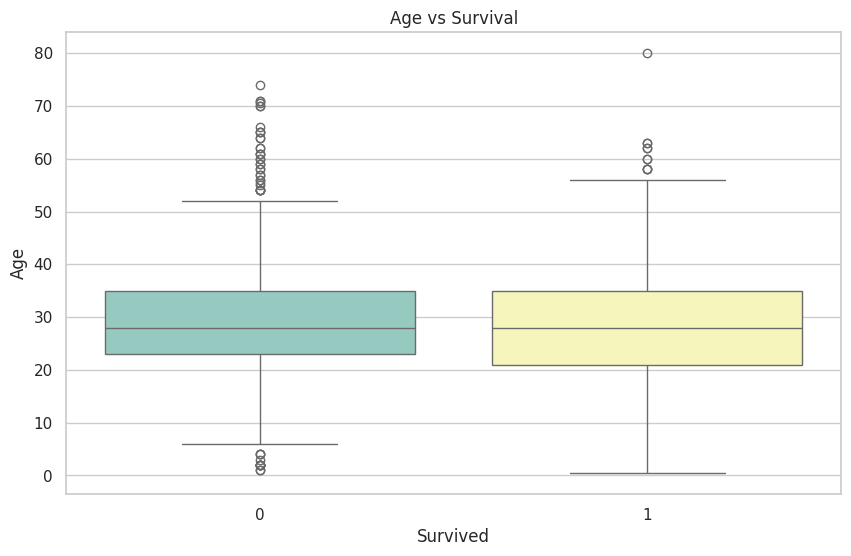

In [ ]:
sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Step 4: Correlation Analysis

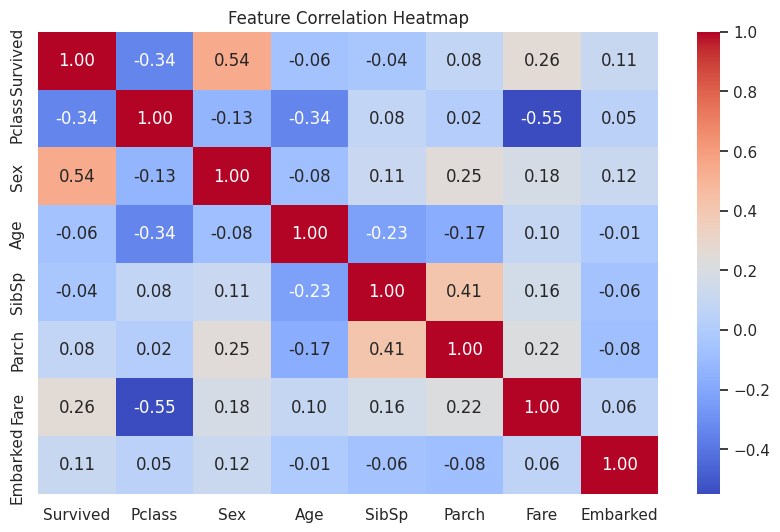

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-numeric or irrelevant columns for correlation
df_encoded = df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# Correlation heatmap
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


>A correlation matrix shows how strongly variables are linearly related.

>Helps detect multicollinearity and influential variables.